# Proyek Analisis Data: E-Commerce
- Kelompok : 1
- Anggota : </br>
10123115 - Muhammad Favian Jiwani</br>
10123091 - Alghifari Raspati</br>
10123122 - Samuel Tigor H.S.</br>
10123090 - Raihan Fathir Muhammad</br>
10123113 - Muhammad Agung Hidayah</br>
10123104 - Muhammad Ilyasa Ar'rahman

### Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import folium
from streamlit_folium import folium_static
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

2025-02-13 11:44:28.988 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Data Wrangling

### 1. Data Gathering
Data Gathering merupakan proses untuk mengumpulkan data, khususnya membaca atau memuat dataset.

In [4]:
customers = pd.read_csv('customers_dataset.csv')
geolocations = pd.read_csv('geolocation_dataset.csv')
order_items = pd.read_csv('order_items_dataset.csv')
order_reviews = pd.read_csv('order_reviews_dataset.csv')
order_payments = pd.read_csv('order_payments_dataset.csv')
order_dataset = pd.read_csv('orders_dataset.csv')
product_categories = pd.read_csv('product_category_name_translation.csv')
product_dataset = pd.read_csv('products_dataset.csv')
seller_dataset = pd.read_csv('sellers_dataset.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2. Assessing Data
Assessing Data adalah proses memeriksa informasi dataset untuk melihat missing values dan tipe data.

In [5]:
# Memeriksa bentuk/dimensi dari dataset
print('customers = ', customers.shape)
print('geolocations = ', geolocations.shape)
print('order_items = ', order_items.shape)
print('order_reviews = ', order_reviews.shape)
print('order_dataset = ', order_dataset.shape)
print('product_categories = ', product_categories.shape)
print('product_dataset = ', product_dataset.shape)
print('seller_dataset = ', seller_dataset.shape)

customers =  (99441, 5)
geolocations =  (1000163, 5)
order_items =  (112650, 7)
order_reviews =  (99224, 7)
order_dataset =  (99441, 8)
product_categories =  (71, 2)
product_dataset =  (32951, 9)
seller_dataset =  (3095, 4)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Menampilkan beberapa sample data
display(customers.head())
display(geolocations.head())
display(order_items.head())
display(order_reviews.head())
display(order_dataset.head())
display(product_categories.head())
display(product_dataset.head())
display(seller_dataset.head())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [7]:
# Memeriksa missing value atau null pada setiap dataset
print('CUSTOMERS')
print(customers.isnull().sum())

print('GEOLOCATIONS')
print(geolocations.isnull().sum())

print('ORDER ITEMS')
print(order_items.isnull().sum())

print('ORDER REVIEWS')
print(order_reviews.isnull().sum())

print('ORDER DATASET')
print(order_dataset.isnull().sum())

print('PRODUCT CATEGORIES')
print(product_categories.isnull().sum())

print('PRODUCT DATASET')
print(product_dataset.isnull().sum())

print('SELLER DATASET')
print(seller_dataset.isnull().sum())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CUSTOMERS
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
GEOLOCATIONS
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
ORDER ITEMS
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
ORDER REVIEWS
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
ORDER DATASET
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approv

In [8]:
# Memeriksa data duplikat pada setiap dataset
print('CUSTOMERS')
print(customers.duplicated().sum())

print('GEOLOCATIONS')
print(geolocations.duplicated().sum())

print('ORDER ITEMS')
print(order_items.duplicated().sum())

print('ORDER REVIEWS')
print(order_reviews.duplicated().sum())

print('ORDER DATASET')
print(order_dataset.duplicated().sum())

print('PRODUCT CATEGORIES')
print(product_categories.duplicated().sum())

print('PRODUCT DATASET')
print(product_dataset.duplicated().sum())

print('SELLER DATASET')
print(seller_dataset.duplicated().sum())

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CUSTOMERS
0
GEOLOCATIONS
261831
ORDER ITEMS
0
ORDER REVIEWS
0
ORDER DATASET
0
PRODUCT CATEGORIES
0
PRODUCT DATASET
0
SELLER DATASET
0


### 3. Cleaning Data
Cleaning Data adalah proses membersihkan atau mempersiapkan data sebelum akhirnya melakukan analisis.

In [9]:
# Mengatasi nilai null dan duplicate pada kolom review_comment_message(Favian)
order_reviews.dropna(subset=['review_comment_message'], inplace=True)
order_reviews.drop_duplicates(inplace=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Memeriksa kembali order_reviews
print('ORDER REVIEWS')
print(order_reviews.isnull().sum())

ORDER REVIEWS
review_id                      0
order_id                       0
review_score                   0
review_comment_title       31138
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1. Analisis Sentimen pada Review Order
### Muhammad Favian Jiwani - 10123115
Sentimen dari setiap review pelanggan dianalisis menggunakan TextBlob, dengan tahapan sebagai berikut:
- Menggunakan fungsi get_sentiment() yang menghitung polarity dari review.
- Memberikan label sentimen berdasarkan nilai polarity:
    - Positive: jika nilai polarity > 0
    - Neutral: jika nilai polarity = 0
    - Negative: jika nilai polarity < 0

Analisis ini membantu memahami bagaimana perasaan pelanggan terhadap pesanan mereka berdasarkan ulasan yang mereka berikan. Distribusi sentimen dan tren waktu dapat memberikan wawasan strategis bagi bisnis untuk meningkatkan kepuasan pelanggan.

In [11]:
# Function analisis sentimen
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Menerapkan function analisis sentimen
order_reviews['sentiment_score'] = order_reviews['review_comment_message'].apply(get_sentiment)
order_reviews['sentiment_label'] = order_reviews['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


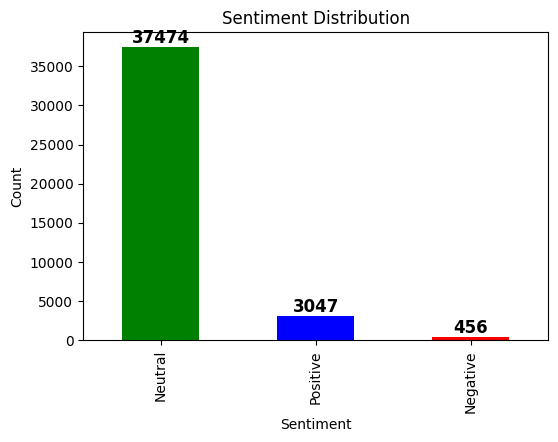

In [13]:
# Visualisasi Distribusi Sentimen (Neutral, Positive, Negative)
plt.figure(figsize=(6,4))
ax = order_reviews['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")

# Menambahkan label jumlah di atas batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


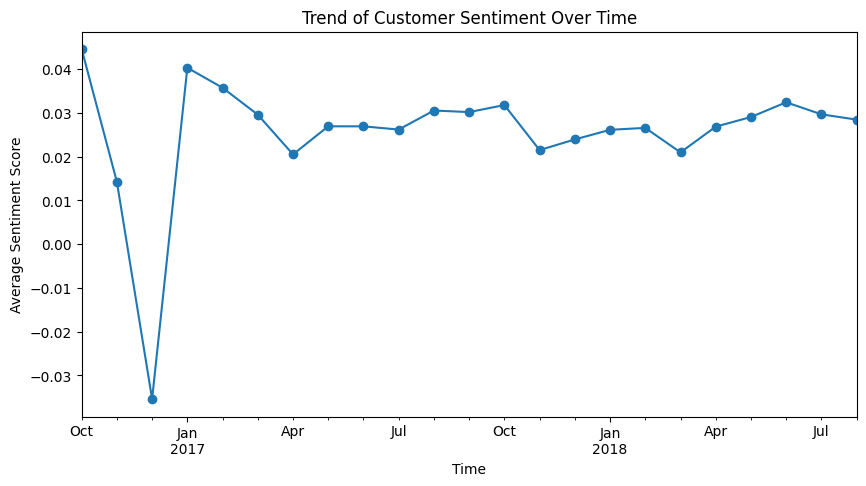

In [14]:
# Analisis Tren Sentimen dari Waktu ke Waktu
if 'review_creation_date' in order_reviews.columns:
    order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
    sentiment_trend = order_reviews.groupby(order_reviews['review_creation_date'].dt.to_period("M")).sentiment_score.mean()

    plt.figure(figsize=(10,5))
    sentiment_trend.plot(kind='line', marker='o', linestyle='-')
    plt.xlabel("Time")
    plt.ylabel("Average Sentiment Score")
    plt.title("Trend of Customer Sentiment Over Time")
    plt.show()

### 2. Peta Distribusi Pelanggan dan Penjual
### Raihan Fathir Muhammad - 10123090
Memvisualisasikan perbandingan wilayah pembeli dan penjual menggunakan Diagram(Untuk melihat perbandingan persentasenya) dan Geoanalysis yang ditampilkan menggunakan map interaktif(Folium). Visualisasi data ini bisa digunakan untuk membantu sebuah perusahaan memahami pola pelanggan dan memberikan wawasan untuk pengoptimalan strategi pemasaran

In [18]:
# Fungsi untuk Loading Data
def load_data():
    # Load dataset
    customers = pd.read_csv('customers_dataset.csv')
    geolocations = pd.read_csv('geolocation_dataset.csv')
    order_items = pd.read_csv('order_items_dataset.csv')
    order_dataset = pd.read_csv('orders_dataset.csv')
    seller_dataset = pd.read_csv('sellers_dataset.csv')

    # Hapus duplikat pada dataset geolocation
    geolocations = geolocations.drop_duplicates(subset=['geolocation_zip_code_prefix'])

    # Merge customer dengan geolocation berdasarkan zip_code_prefix
    customers_geo = pd.merge(customers, geolocations, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns=['geolocation_zip_code_prefix'])

    # Merge seller dengan geolocation untuk mendapatkan latitude & longitude
    sellers_geo = pd.merge(seller_dataset, geolocations, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left').drop(columns=['geolocation_zip_code_prefix'])

    # Pastikan seller_geo memiliki lat dan lng
    sellers_geo.rename(columns={'geolocation_lat': 'seller_lat', 'geolocation_lng': 'seller_lng'}, inplace=True)

    # Merge customer dengan order
    CustomersOrders = pd.merge(customers_geo, order_dataset, on='customer_id')

    # Merge dengan order_items
    CustomerOrdersItems = pd.merge(order_items, CustomersOrders, on='order_id')

    # Merge dengan seller (yang sudah memiliki lat-lng)
    CustomerSeller = pd.merge(sellers_geo, CustomerOrdersItems, on='seller_id')

    # Tambahkan kolom 'WilayahSama' untuk cek apakah pelanggan dan penjual dari wilayah yang sama
    CustomerSeller['WilayahSama'] = CustomerSeller['customer_state'] == CustomerSeller['seller_state']

    return CustomerSeller

# Load data
data = load_data()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Hitung persentase
JumlahWilayahSama = data['WilayahSama'].sum()
JumlahPembelian = len(data)
PersentaseWilayahSama = (JumlahWilayahSama / JumlahPembelian) * 100

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


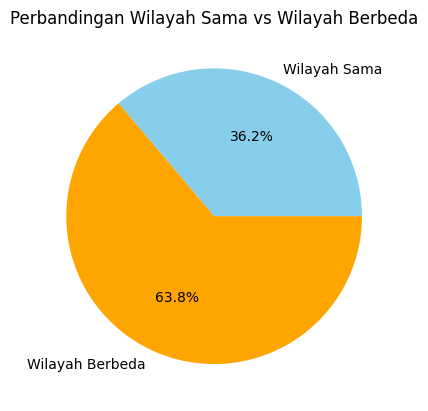

In [20]:
# Visualisasi Perbandingan Wilayah Sama vs Wilayah Berbeda
fig, ax = plt.subplots()
ax.pie(
    [JumlahWilayahSama, JumlahPembelian - JumlahWilayahSama],
    labels=['Wilayah Sama', 'Wilayah Berbeda'],
    autopct='%1.1f%%',
    colors=['skyblue', 'orange']
)
ax.set_title('Perbandingan Wilayah Sama vs Wilayah Berbeda')
plt.show()

In [21]:
# Hapus data Null/Nan
data_clean = data.dropna(subset=['geolocation_lat', 'geolocation_lng', 'seller_lat', 'seller_lng'])

# Membatasi jumlah data yang akan ditampilkan di peta
sample_data = data_clean.sample(n=min(2000, len(data_clean)), random_state=42)

# Buat peta
map = folium.Map(location=[sample_data.iloc[0]['geolocation_lat'], sample_data.iloc[0]['geolocation_lng']], zoom_start=5)

# Tambahkan titik pelanggan dan penjual
for idx, row in sample_data.iterrows():
    # Marker pelanggan
    folium.Circle(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=3,
        color="blue",
        fill=True,
        fill_color="blue",
        popup=f"Pelanggan: {row['customer_city']}, {row['customer_state']}"
    ).add_to(map)

    # Marker penjual
    folium.Circle(
        location=[row['seller_lat'], row['seller_lng']],
        radius=3,
        color="red",
        fill=True,
        fill_color="red",
        popup=f"Penjual: {row['seller_city']}, {row['seller_state']}"
    ).add_to(map)

# Output
display(map)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 3. Prediksi Penjualan dalam 12 bulan kedepan Menggunakan LSTM
### Muhammad Ilyasa Ar'rahman - 10123104
Memprediksi dan memvisualisasikan hasil prediksi dalam bentuk diagram. Jika hasil dari prediksi ini meningkat, ini bisa digunakan oleh penjual untuk melakukan perencanaan stok dan produksi. Selain itu jika prediksi penjualannya menurun, penjual bisa membuat perencanaan strategi selanjutnya untuk menghindari penurunan penjualan.

In [23]:
# Load dataset
orders = pd.read_csv("orders_dataset.csv", parse_dates=['order_purchase_timestamp'])
order_items = pd.read_csv("order_items_dataset.csv")

# Merge order_items dengan orders berdasarkan order_id
sales_data = pd.merge(order_items, orders, on="order_id")
sales_data = sales_data[sales_data["order_status"] == "delivered"]
sales_data["total_price"] = sales_data["price"]
sales_data['year'] = sales_data['order_purchase_timestamp'].dt.year
sales_data['month'] = sales_data['order_purchase_timestamp'].dt.month

# Hitung total penjualan per bulan
monthly_sales = sales_data.groupby(['year', 'month'])[['total_price']].sum().reset_index()
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
monthly_sales.set_index('date', inplace=True)
monthly_sales = monthly_sales[['total_price']]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-1bf7ea518f2a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["total_price"] = sales_data["price"]
<ipython-input-23-1bf7ea518f2a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [24]:
# Normalisasi data
scaler = MinMaxScaler()
monthly_sales_scaled = scaler.fit_transform(monthly_sales)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Data LSTM (Menggunakan 12 bulan terakhir untuk memprediksi 1 bulan ke depan)
window_size = 12
X, y = [], []
for i in range(len(monthly_sales_scaled) - window_size):
    X.append(monthly_sales_scaled[i:i+window_size])
    y.append(monthly_sales_scaled[i+window_size])

X, y = np.array(X), np.array(y)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Split data (80% training, 20% testing)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Model LSTM
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.8409 - val_loss: 0.7774
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.8226 - val_loss: 0.7564
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.8056 - val_loss: 0.7339
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.7885 - val_loss: 0.7125
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.7720 - val_loss: 0.6910
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.7546 - val_loss: 0.6680
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.7366 - val_loss: 0.6447
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.7193 - val_loss: 0.6233
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.7038 - val_loss: 0.6036
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6880 - val_loss: 0.5817
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.6705 - val_loss: 0.5580
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6517 - val_loss: 0.5325
Epo

In [28]:
# Prediksi Penjualan Masa Depan (12 Bulan ke Depan)
future_predictions = []
last_window = monthly_sales_scaled[-window_size:]

for _ in range(12):  # Prediksi 12 bulan ke depan
    next_pred = model.predict(last_window.reshape(1, window_size, 1))
    future_predictions.append(next_pred[0, 0])
    last_window = np.append(last_window[1:], next_pred).reshape(window_size, 1)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())
/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py:315: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(self._numpy())


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


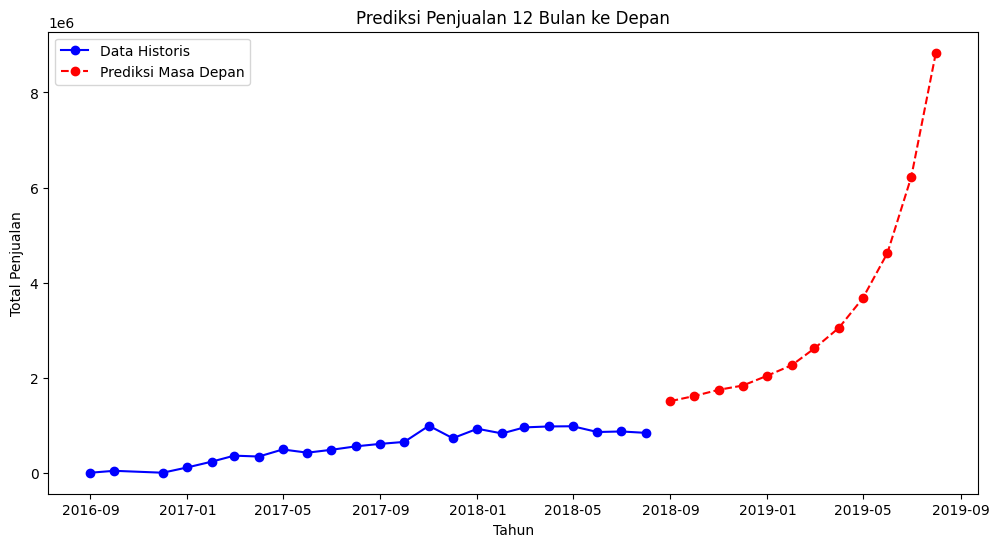

In [29]:
# Transform hasil prediksi kembali ke skala asli
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Tanggal untuk prediksi
future_dates = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Visualisasi Prediksi Masa Depan
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['total_price'], marker='o', linestyle='-', label="Data Historis", color="blue")
plt.plot(future_dates, future_predictions, marker='o', linestyle='--', label="Prediksi Masa Depan", color="red")
plt.xlabel("Tahun")
plt.ylabel("Total Penjualan")
plt.title("Prediksi Penjualan 12 Bulan ke Depan")
plt.legend()
plt.show()

### 4. Analisis Pola Pembelian
### Alghifari Raspati - 10123091

In [30]:
# === 1. Memuat Dataset ===
product_df = pd.read_csv('products_dataset.csv')
order_df = pd.read_csv('order_items_dataset.csv')
payment_df = pd.read_csv('order_payments_dataset.csv')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# === 2. Preprocessing Data ===
# Konversi tipe data untuk konsistensi
for df in [product_df, order_df, payment_df]:
    for col in ['product_id', 'order_id']:
        if col in df.columns:
            df[col] = df[col].astype(str)

# Hapus duplikasi produk
product_df.drop_duplicates(subset='product_id', inplace=True)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# === 3. Gabungkan Dataset ===
# Gabungkan order_df dengan product_df berdasarkan product_id
combined_df = order_df.merge(product_df, on='product_id', how='inner')

# Gabungkan dengan payment_df berdasarkan order_id
combined_df = combined_df.merge(payment_df, on='order_id', how='inner')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# === 4. Mengelompokkan Data ===
# Periksa apakah kolom yang dibutuhkan ada
required_cols = {'product_category_name', 'payment_type'}
if not required_cols.issubset(combined_df.columns):
    raise ValueError(f"Kolom yang dibutuhkan tidak ditemukan: {required_cols - set(combined_df.columns)}")

# Group by order_id dan gabungkan kategori produk serta metode pembayaran
grouped_data = combined_df.groupby('order_id')[['product_category_name', 'payment_type']].agg(list).reset_index()

# Gabungkan kategori produk dan metode pembayaran dalam satu transaksi
grouped_data['items'] = grouped_data.apply(lambda row: row['product_category_name'] + row['payment_type'], axis=1)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# === 5. Encoding Transaksi ===
# Pastikan semua elemen dalam 'items' adalah string
grouped_data['items'] = grouped_data['items'].apply(lambda x: [str(item) for item in x if pd.notna(item)])

te = TransactionEncoder()
te_ary = te.fit(grouped_data['items']).transform(grouped_data['items'])
df_te = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# === 6. Menjalankan Apriori untuk Frequent Itemsets ===
# Jalankan apriori untuk menemukan itemset yang sering muncul
frequent_itemsets = apriori(df_te, min_support=0.02, use_colnames=True)

# Buat aturan asosiasi berdasarkan confidence
association_results = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Ambil 10 aturan asosiasi dengan confidence tertinggi
top_10_rules = association_results.sort_values(by='confidence', ascending=False).head(10)

# Ubah antecedents dan consequents menjadi string untuk visualisasi
top_10_rules['antecedents'] = top_10_rules['antecedents'].apply(lambda x: ', '.join(x))
top_10_rules['consequents'] = top_10_rules['consequents'].apply(lambda x: ', '.join(x))


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


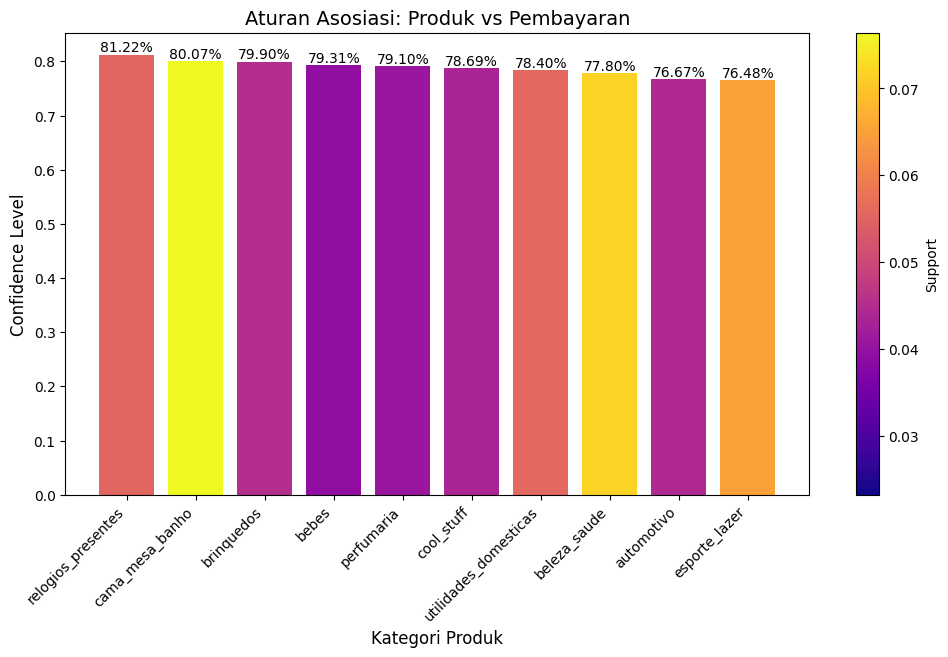

In [36]:
# === 7. Visualisasi Hasil dengan Matplotlib ===
# Buat figure dan axis
fig, ax = plt.subplots(figsize=(12, 6))

# Warna berdasarkan support menggunakan colormap
colors = plt.cm.plasma(top_10_rules['support'] / max(top_10_rules['support']))

# Buat bar chart
bars = ax.bar(top_10_rules['antecedents'], top_10_rules['confidence'], color=colors)

# Tambahkan nilai confidence di atas batang
for bar, confidence in zip(bars, top_10_rules['confidence']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{confidence:.2%}", ha='center', va='bottom', fontsize=10)

# Konfigurasi sumbu dan judul
ax.set_xlabel("Kategori Produk", fontsize=12)
ax.set_ylabel("Confidence Level", fontsize=12)
ax.set_title("Aturan Asosiasi: Produk vs Pembayaran", fontsize=14)

# Atur posisi label sumbu x
ax.set_xticks(range(len(top_10_rules['antecedents'])))
ax.set_xticklabels(top_10_rules['antecedents'], rotation=45, ha='right')

# Tambahkan colorbar untuk support
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(top_10_rules['support']), vmax=max(top_10_rules['support'])))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Support")

# Tampilkan plot
plt.show()

### 5. Clustering pelanggan berdasarkan pola pembelian
### Samuel Tigor Hasiholan Sinaga - 10123122
Clustering pelanggan berdasarkan pola pembelian adalah teknik analisis data yang digunakan untuk mengelompokkan pelanggan ke dalam beberapa grup berdasarkan kesamaan pola orang yang berbelanja

In [37]:
# Load dataset transaksi
file_path = "order_items_dataset.csv"
df = pd.read_csv(file_path)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Agregasi data berdasarkan customer_id (jumlah transaksi dan total belanja)
df_grouped = df.groupby("order_id").agg({"price": "sum", "order_item_id": "count"}).reset_index()
df_grouped.columns = ["customer_id", "total_spent", "total_orders"]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
# Normalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped[["total_spent", "total_orders"]])

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
# Menentukan jumlah klaster menggunakan metode Elbow
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [41]:
# Menjalankan K-Means dengan jumlah klaster optimal (misal k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped["cluster"] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


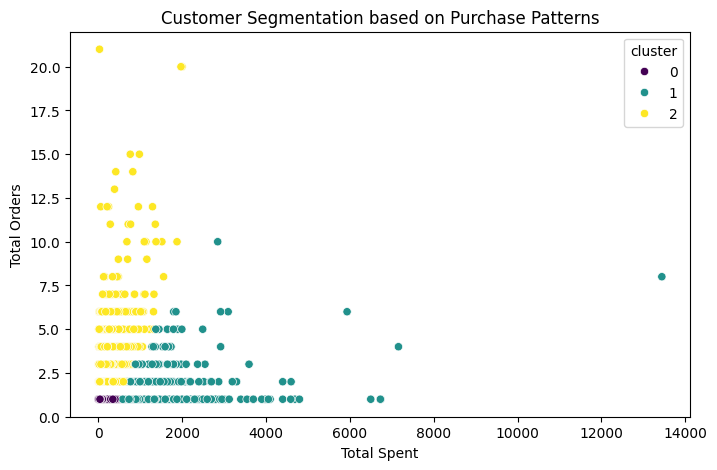

In [42]:
# Visualisasi hasil clustering
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_grouped["total_spent"], y=df_grouped["total_orders"], hue=df_grouped["cluster"], palette="viridis")
plt.xlabel("Total Spent")
plt.ylabel("Total Orders")
plt.title("Customer Segmentation based on Purchase Patterns")
plt.show()

Clustering pelanggan berdasarkan pola pembelian
Samuel Tigor Hasiholan Sinaga - 10123122
Clustering pelanggan berdasarkan pola pembelian adalah teknik analisis data yang digunakan untuk mengelompokkan pelanggan ke dalam beberapa grup berdasarkan kesamaan pola orang yang berbelanja

### 6. Apakah terdapat korelasi antara lama pengiriman dengan ulasan pembeli?
### Muhammad Agung Hidayah - 10123113


In [43]:
# Menggabungkan orders dengan order_reviews
merge = pd.merge(order_dataset, order_reviews, on='order_id', how='inner')
selected_columns = [
    'order_id',
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'order_status',
    'review_score'
]
merge = merge[selected_columns]

# Menampilkan sample data
merge.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
3  136cce7faa42fdb2cefd53fdc79a6098      2017-04-11 12:22:08   
4  e6ce16cb79ec1d90b1da9085a6118aeb      2017-05-16 19:41:10   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2017-11-22 13:39:59           2017-12-02 00:28:42   
3                          NaN                           NaN   
4          2017-05-18 11:40:40           2017-05-29 11:18:31   

  order_estimated_delivery_date order_status  review_score  
0           2017-10-18 00:00:00    delivered             4  
1           2018-08-13 00:00:00    delivered             4  
2           2017-12-15 00:00:00    delivered             5  
3           2017-05-09 00:00:00     invoiced             2  
4           2017-06-07 00:00:00    delivered             1

In [44]:
# Konversi kolom tanggal ke tipe datetime
merge['order_purchase_timestamp'] = pd.to_datetime(merge['order_purchase_timestamp'])
merge['order_delivered_carrier_date'] = pd.to_datetime(merge['order_delivered_carrier_date'])
merge['order_delivered_customer_date'] = pd.to_datetime(merge['order_delivered_customer_date'])
merge['order_estimated_delivery_date'] = pd.to_datetime(merge['order_estimated_delivery_date'])

# menghitung lama pengiriman (hari)
merge['delivery_time'] = (merge['order_delivered_customer_date'] - merge['order_purchase_timestamp']).dt.days

# menghitung keterlambatan pengiriman (hari)
merge['delay'] = (merge['order_delivered_customer_date'] - merge['order_estimated_delivery_date']).dt.days

# Jika delay bernilai negatif (artinya pesanan dikirim lebih cepat) ubah menjadi 0
merge['delay'] = merge['delay'].apply(lambda x: x if x > 0 else 0)

# Membuat Kategori
bins = [0, 3, 7, 14, 30, 60]
labels = ['0-3 hari', '4-7 hari', '8-14 hari', '15-30 hari', '>30 hari']
merge['delivery_time_category'] = pd.cut(merge['delivery_time'], bins=bins, labels=labels, right=False)

# Hitung rata-rata skor ulasan berdasarkan kategori lama pengiriman
review_by_delivery_time = merge.groupby('delivery_time_category', observed=True)['review_score'].mean().reset_index()

# Menampilkan sample data
merge.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


order_id order_purchase_timestamp  \
0  e481f51cbdc54678b7cc49136f2d6af7      2017-10-02 10:56:33   
1  53cdb2fc8bc7dce0b6741e2150273451      2018-07-24 20:41:37   
2  949d5b44dbf5de918fe9c16f97b45f8a      2017-11-18 19:28:06   
3  136cce7faa42fdb2cefd53fdc79a6098      2017-04-11 12:22:08   
4  e6ce16cb79ec1d90b1da9085a6118aeb      2017-05-16 19:41:10   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2017-11-22 13:39:59           2017-12-02 00:28:42   
3                          NaT                           NaT   
4          2017-05-18 11:40:40           2017-05-29 11:18:31   

  order_estimated_delivery_date order_status  review_score  delivery_time  \
0                    2017-10-18    delivered             4            8.0   
1                    2018-08-13    delivered             4           13.0   
2                    2017-12-15    delivered             5           13.0   
3                    2017-05-09     invoiced             2            NaN   
4                    2017-06-07    delivered             1           12.0   

   delay delivery_time_category  
0    0.0              8-14 hari  
1    0.0              8-14 hari  
2    0.0              8-14 hari  
3    0.0                    NaN  
4    0.0              8-14 hari

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


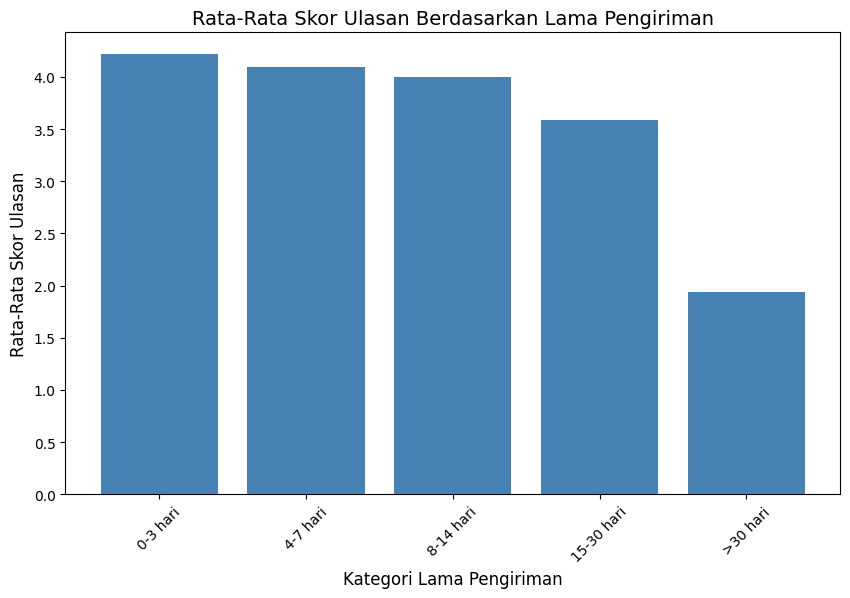

In [45]:
# Visualisasi data
delivery_time_categories = review_by_delivery_time['delivery_time_category']
average_review_scores = review_by_delivery_time['review_score']
plt.figure(figsize=(10, 6))
plt.bar(delivery_time_categories, average_review_scores, color='steelblue')
plt.title('Rata-Rata Skor Ulasan Berdasarkan Lama Pengiriman', fontsize=14)
plt.xlabel('Kategori Lama Pengiriman', fontsize=12)
plt.ylabel('Rata-Rata Skor Ulasan', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Conclusion
### Kesimpulan Kasus 1
- Berdasarkan distribusi sentimen yang diberikan, terlihat bahwa mayoritas ulasan dalam dataset order_reviews_dataset cenderung memiliki sentimen positif. Hal ini ditunjukkan oleh fakta bahwa dalam setiap kategori "Count", sentimen positif muncul lebih dominan dibandingkan dengan sentimen netral. Meskipun terdapat beberapa ulasan yang netral, sentimen positif tetap mendominasi, yang dapat mengindikasikan bahwa pengalaman pelanggan secara umum adalah memuaskan.
### Kesimpulan Kasus 2
-  visualisasi ini menggunakan diagram dan analisis geografis (Geoanalysis) dengan peta interaktif (Folium) untuk membandingkan wilayah pembeli dan penjual. Visualisasi ini membantu dalam memahami pola distribusi pelanggan dan penjual di berbagai wilayah, seperti Porto Velho, Cujaba, Salvador, dan lainnya. Dengan membandingkan persentase pembeli dan penjual di setiap wilayah, perusahaan dapat mengidentifikasi area dengan potensi pasar yang tinggi atau rendah. Informasi ini sangat berharga untuk mengoptimalkan strategi pemasaran, seperti meningkatkan penetrasi pasar di wilayah yang kurang terjangkau atau memperkuat kehadiran di daerah dengan permintaan tinggi.
### Kesimpulan Kasus 3
- Berdasarkan grafik prediksi penjualan 12 bulan ke depan, terlihat bahwa data historis penjualan dari September 2016 hingga September 2019 menunjukkan peningkatan penjualan. Prediksi masa depan yang dihasilkan menggunakan model LSTM memberikan proyeksi untuk 12 bulan berikutnya. Jika tren prediksi menunjukkan peningkatan, ini dapat menjadi indikator yang baik untuk meningkatkan persiapan stok dan produksi guna memenuhi permintaan yang diperkirakan akan naik. Sebaliknya, jika prediksi menunjukkan penurunan, penting bagi penjual untuk segera merancang strategi pemasaran atau promosi untuk mengatasi potensi penurunan penjualan.
### Kesimpulan Kasus 4
- Berdasarkan grafik aturan asosiasi yang menganalisis hubungan antara produk dan metode pembayaran, terlihat bahwa terdapat beberapa pola pembelian yang memiliki tingkat kepercayaan (confidence level) yang cukup tinggi, berkisar antara 76.48% hingga 81.22%. Tingkat kepercayaan ini menunjukkan seberapa kuat hubungan antara produk tertentu dengan metode pembayaran yang digunakan oleh pelanggan.
### Kesimpulan Kasus 5
- Berdasarkan grafik segmentasi pelanggan yang mengelompokkan pelanggan berdasarkan pola pembelian, terlihat bahwa pelanggan dapat dibagi menjadi tiga klaster utama (klaster 0, 1, dan 2). Setiap klaster menunjukkan perbedaan dalam total pengeluaran dan jumlah pesanan.
### Kesimpulan Kasus 6
- Berdasarkan hasil dari visualisasi data yang disajikand dengan grafik batang. Terdapat penurunan review dari pembeli ketika pengiriman produk lebih lama. Produk yang diterima pembeli lebih cepat cenderung memiliki review yang lebih tinggi. Hasil dari percobaan ini bisa dimanfaatkan oleh pemilik bisnis untuk mengatasi permasalahan mengenai pengiriman produk supaya pembeli lebih puas. Oleh karena itu, dapat disimpulkan bahwa terdapat korelasi atau hubungan antara lama pengiriman dengan ulasan pembeli